Первый шаг – загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, типы данных, размерность, наличие пропущенных значений.

В каком столбце встретилось больше всего пропущенных значений? В качестве ответа укажите их число, после чего удалите строки с пропущенными значениями из датасета.

In [6]:
import pandas as pd

games = pd.read_csv('games.csv')
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [8]:
games.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [10]:
games.dropna(inplace=True)
games.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

Ответ: в строке Year

Выведите описательные характеристики переменной Year и постройте график распределения количества выпущенных игр по годам.



In [14]:
games['Year'].mode()

0    2009.0
Name: Year, dtype: float64

In [16]:
games.Year.var()

34.017032298429996

In [18]:
games.Year.std()

5.8324122195220385

In [20]:
games.Year.median()

2007.0

In [22]:
games.Year.mean()

2006.4055613528942

На каких платформах произошло больше всего релизов?

Оставьте названия только тех платформ, частота встречаемости которых составляет более 7%. Значения укажите в порядке убывания частоты встречаемости через запятую с пробелом.

In [25]:
relize = games.Platform.value_counts(normalize=True).reset_index()
relize

,Platform,proportion
0,DS,0.130808
1,PS2,0.130563
2,PS3,0.080044
3,Wii,0.079185
4,X360,0.075747
5,PSP,0.073476
6,PS,0.072985
7,PC,0.057578
8,XB,0.049291
9,GBA,0.048247


In [27]:
more_than_7 = relize.query('proportion > 0.07')
more_than_7

,Platform,proportion
0,DS,0.130808
1,PS2,0.130563
2,PS3,0.080044
3,Wii,0.079185
4,X360,0.075747
5,PSP,0.073476
6,PS,0.072985


Игры каких издателей (Publisher) встречаются в датасете чаще всего?

В качестве ответа укажите наибольшую абсолютную частоту встречаемости.

In [30]:
games.Publisher.value_counts().reset_index()

,Publisher,count
0,Electronic Arts,1339
1,Activision,966
2,Namco Bandai Games,928
3,Ubisoft,918
4,Konami Digital Entertainment,823
...,...,...
571,Detn8 Games,1
572,Pow,1
573,Navarre Corp,1
574,MediaQuest,1


Ответ: Electronic Arts - 1339

Сфокусируемся на играх от Nintendo. Посчитайте среднее, медиану и стандартное отклонение по продажам игр данного издателя в разных регионах (NA, EU, JP, Other).

В каком регионе медианное значение объема продаж является наибольшим?

Hint: mean, median, std. Переменные: NA_sales и т.д. для нужных регионов.

In [34]:
nintendo = games.query('Publisher == "Nintendo"')
nintendo.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [36]:
nintendo = nintendo.rename(columns=lambda col: col.lower())
nintendo.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [38]:
nintendo.na_sales.median()

0.375

In [40]:
nintendo.na_sales.mean()

1.1720545977011492

In [42]:
nintendo.na_sales.std()

2.98991281649686

Теперь посмотрим на продажи Nintendo в Японии по жанрам. Постройте боксплот, где:

по оси x будет расположен жанр игры (Genre)
по оси у – объем продаж в Японии (JP_sales)
Взглянем на получившиеся боксплоты. Что мы можем по ним сказать о данных?

Hint: sns.boxplot(). Для удобства можете изменить размер графика, например: plt.figure(figsize=(16,16))

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

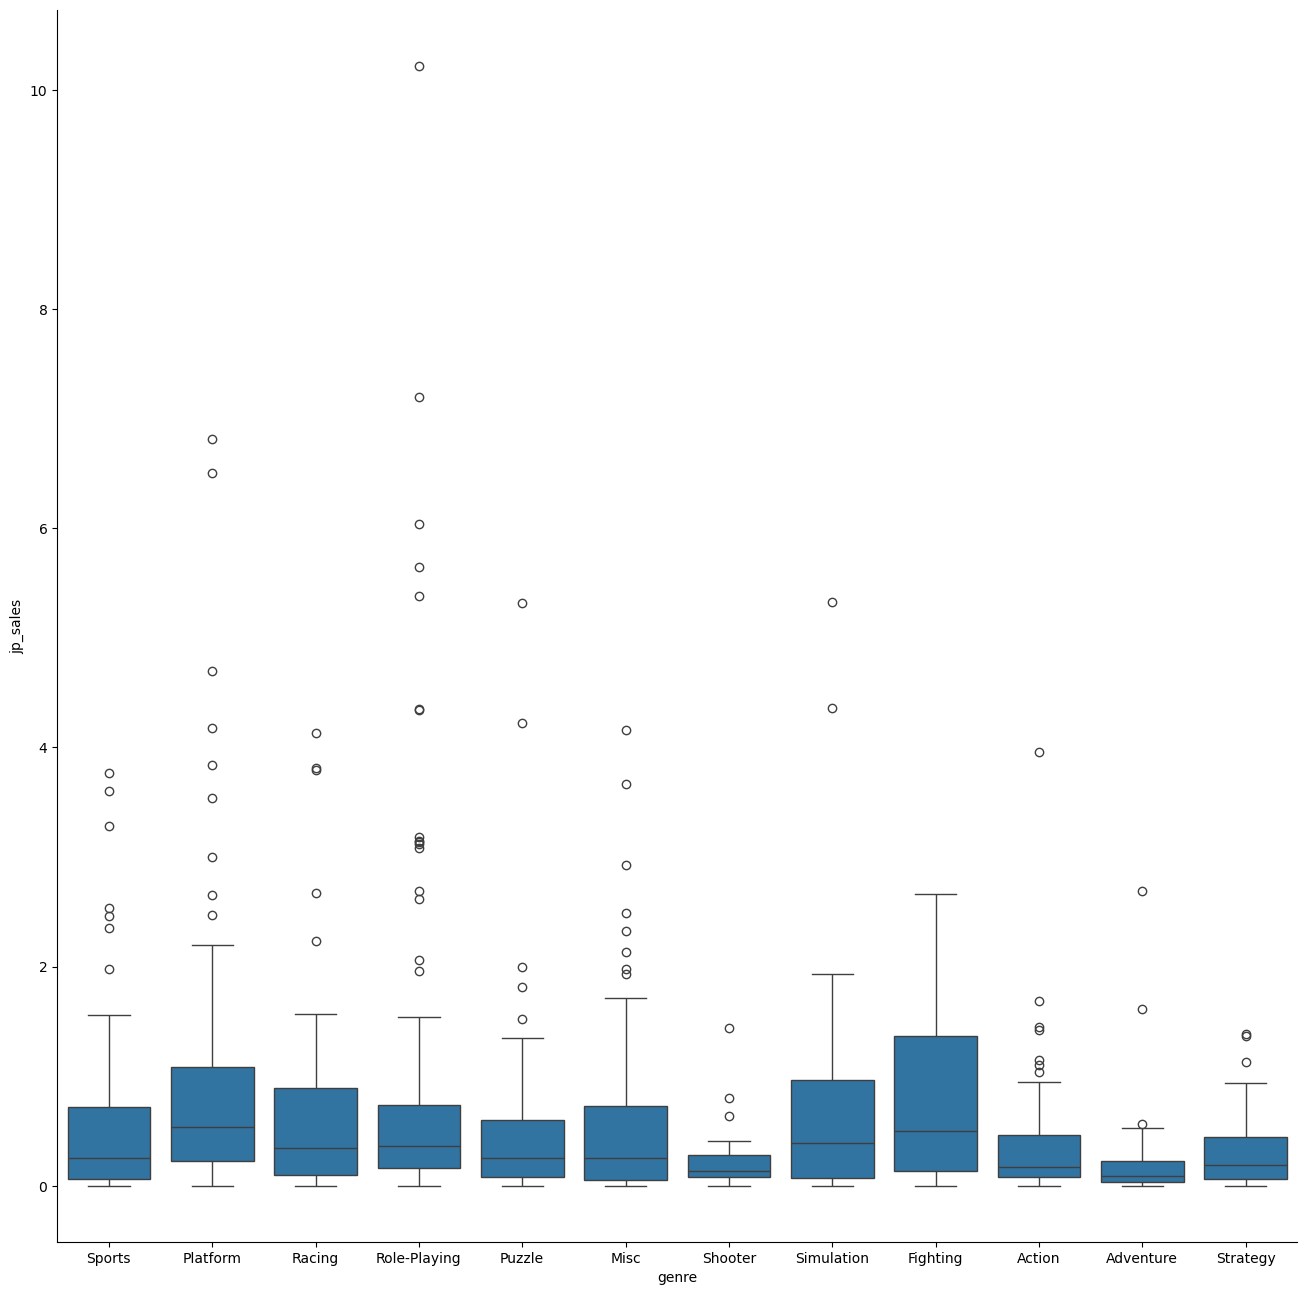

In [47]:
plt.figure(figsize=(16,16))
sns.boxplot(x=nintendo.genre, y=nintendo.jp_sales)
sns.despine()